<h1>Librerias</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1>Dataframe</h1>

In [2]:
data= pd.read_csv("./Dataset/Codicia_del_invocador.csv", sep=";",encoding='latin-1')
data= data.dropna(how='all', axis='columns') #elimina las columnas donde faltan todos los datos
data.head()

,Id,Nombre,Rareza,Tipo,Dano,Lvl,Oro Gastado
0,1.0,Slimey,Comun,Normal,2.843.828.453,500,872750
1,1.1,Slimey-Evo,Comun,Normal,28.438.284.530,500,872750
2,2.0,Clyde,Comun,Normal,2.843.828.453,500,872750
3,3.0,Grimey,Comun,Normal,1.895.932.639,500,872750
4,4.0,Sparky,Comun,Electrico,2.843.828.453,500,872750


In [3]:
data.dtypes

Id             float64
Nombre          object
Rareza          object
Tipo            object
Dano            object
Lvl              int64
Oro Gastado      int64
dtype: object

<h1>Agrupamiento y Ordenamiento</h1>

In [4]:
#Crear un nuevo df para poder hacer calculos mas comdamente
orden= data[["Nombre","Rareza","Tipo","Dano","Oro Gastado"]].dropna()
orden.head()

,Nombre,Rareza,Tipo,Dano,Oro Gastado
0,Slimey,Comun,Normal,2.843.828.453,872750
1,Slimey-Evo,Comun,Normal,28.438.284.530,872750
2,Clyde,Comun,Normal,2.843.828.453,872750
3,Grimey,Comun,Normal,1.895.932.639,872750
4,Sparky,Comun,Electrico,2.843.828.453,872750


<h3>Cambiando el Tipo de Datos</h3>

In [5]:
orden["Dano"] = orden["Dano"].str.replace('.', '',regex=True).astype(np.int64)
orden.dtypes

Nombre         object
Rareza         object
Tipo           object
Dano            int64
Oro Gastado     int64
dtype: object

<h1>Graficando Datos a Analizar</h1>

In [6]:
#Ordenando valores por mayor daño y guardando los primeros 20
damage= orden.sort_values('Dano',ascending= False).head(20)
damage[["Nombre","Dano"]].head()

,Nombre,Dano
63,Cheebs,1137483425703
75,Amaterasu,1137483425703
73,Swoleseidon-Evo,1137483425652
84,Draco Indigo Bylle,758316782486
53,Ifrit-Evo,568745943360


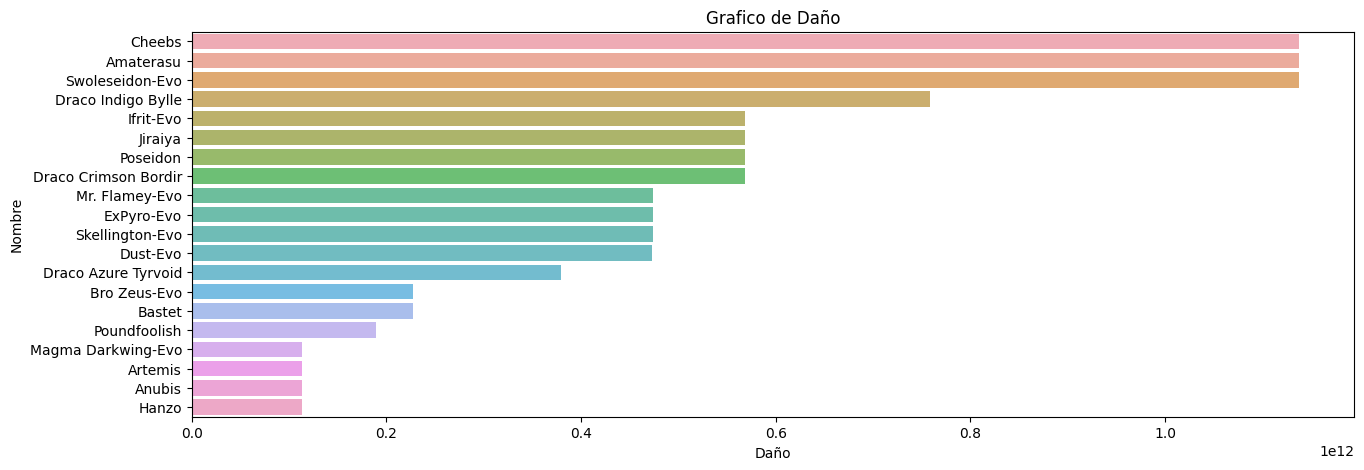

In [7]:
#Top 20 de mayor daño
plt.figure(figsize=(15,5))
sns.barplot(y= damage["Nombre"], x=damage['Dano'], alpha=0.8)
plt.title('Grafico de Daño')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()

In [8]:
#Ordenando valores por mayor daño y guardando los primeros 20
cost= orden.sort_values('Oro Gastado',ascending= False).head(20)
cost[["Nombre","Oro Gastado"]].head()

,Nombre,Oro Gastado
48,Darkwing,39900500
54,Pony Sparks,39900500
61,Limzard,39900500
60,Archangel Gabriel,39900500
59,Arch-Archimedes-Evo,39900500


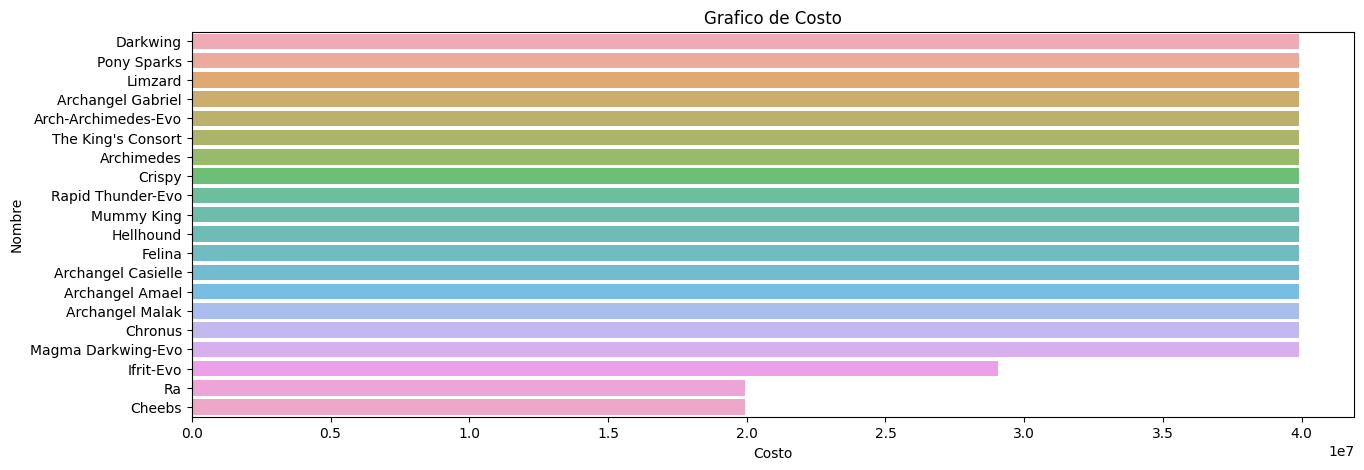

In [9]:
#Top 20 de mayor costo
plt.figure(figsize=(15,5))
sns.barplot(y= cost["Nombre"], x=cost['Oro Gastado'], alpha=0.8)
plt.title('Grafico de Costo')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Costo', fontsize=10)
plt.show()

<h3>Datos por Categorias</h3>

In [10]:
#Describiendo datos por rareza de monstruo
orden.groupby(by="Rareza")["Dano"].describe()

,count,mean,std,min,25%,50%,75%,max
Rareza,,,,,,,,
Comun,8.0,7.040846e+10,1.639600e+11,1.895933e+09,2.843828e+09,2.843828e+09,3.320170e+10,4.740662e+11
Epico,14.0,4.746421e+10,1.264667e+11,0.000000e+00,0.000000e+00,3.791724e+09,4.502646e+09,4.739655e+11
Especial,17.0,1.468695e+11,2.883133e+11,3.791724e+09,1.895806e+10,5.687389e+10,9.479099e+10,1.137483e+12
Legendario,15.0,7.590825e+10,1.164310e+11,9.479099e+09,1.232279e+10,3.791611e+10,9.479099e+10,4.731940e+11
Mitico,20.0,3.230447e+11,3.548271e+11,0.000000e+00,1.137483e+11,1.137483e+11,5.687386e+11,1.137483e+12
Raro,11.0,5.545406e+10,1.404840e+11,1.421985e+09,2.369881e+09,2.843828e+09,3.080809e+10,4.739620e+11


In [11]:
#Daños por tipo
tipo= orden[["Nombre","Tipo","Dano"]]
valores= tipo.groupby(by="Tipo")["Dano"].sum().sort_values(ascending=False)
valores

Tipo
Fuego                    4376797981236
Hielo                    3042300916450
Normal                   2872153591508
Electrico                 780221807638
Cosmico                   758316782486
Hielo/Fuego/Electrico      85310833739
Hielo/Fuego                18958057104
Name: Dano, dtype: int64

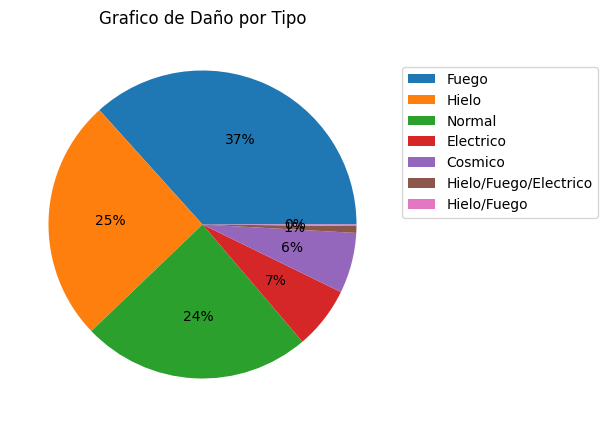

In [12]:
plt.figure(figsize=(15,5))
plt.pie(valores,autopct = '%0.0f%%')
plt.title('Grafico de Daño por Tipo')
plt.legend(loc="lower left",bbox_to_anchor=(1.0, 0.5),labels=valores.index)

In [13]:
#Daño de monstruo por cada tipo
elementos= orden[["Nombre","Tipo","Dano"]].sort_values('Tipo',ascending= False)

#Buscando los monstruos tipo electricos
electricos= pd.DataFrame() #se crean los df vacios por tipo
electricos["Nombre"]= None
aux=[]
aux2=[]
fuego= pd.DataFrame()
aux3=[]
aux4=[]
hielo= pd.DataFrame()
aux5=[]
aux6=[]
normal= pd.DataFrame()
aux7=[]
aux8=[]

for index, row in elementos.iterrows():
    if(row["Tipo"]=="Electrico"):
        aux.append(row["Nombre"])
        aux2.append(row["Dano"])
    if(row["Tipo"]=="Fuego"):
        aux3.append(row["Nombre"])
        aux4.append(row["Dano"])
    if(row["Tipo"]=="Hielo"):
        aux5.append(row["Nombre"])
        aux6.append(row["Dano"])
    if(row["Tipo"]=="Normal"):
        aux7.append(row["Nombre"])
        aux8.append(row["Dano"])
        
electricos["Nombre"]= aux
electricos["Dano"]= aux2
fuego["Nombre"]= aux3
fuego["Dano"]= aux4
hielo["Nombre"]= aux5
hielo["Dano"]= aux6
normal["Nombre"]= aux7
normal["Dano"]= aux8

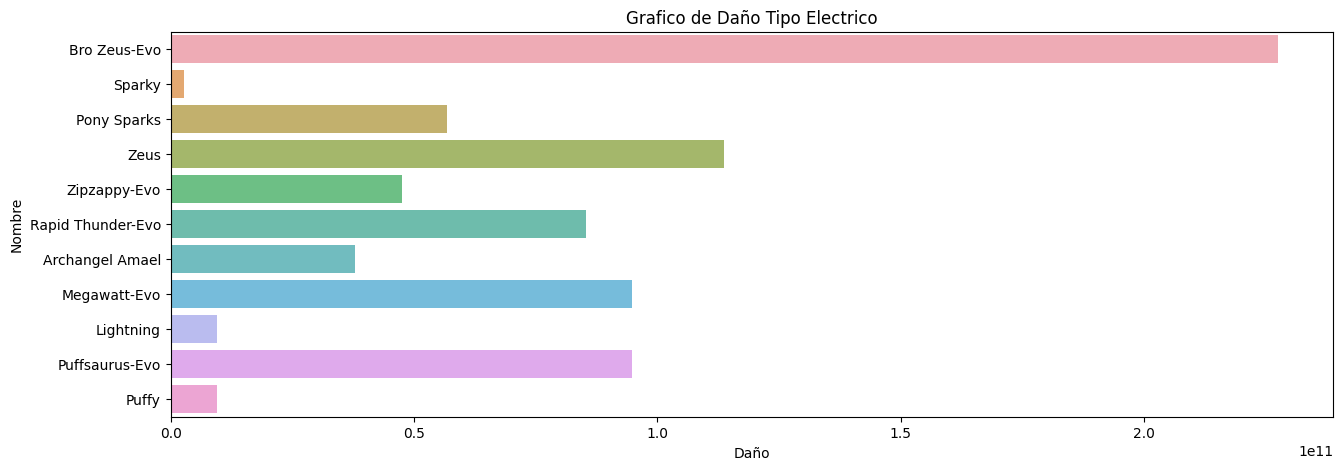

In [14]:
#Grafica daño tipo electrico
plt.figure(figsize=(15,5))
sns.barplot(y= electricos["Nombre"], x=electricos['Dano'], alpha=0.8)
plt.title('Grafico de Daño Tipo Electrico')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()

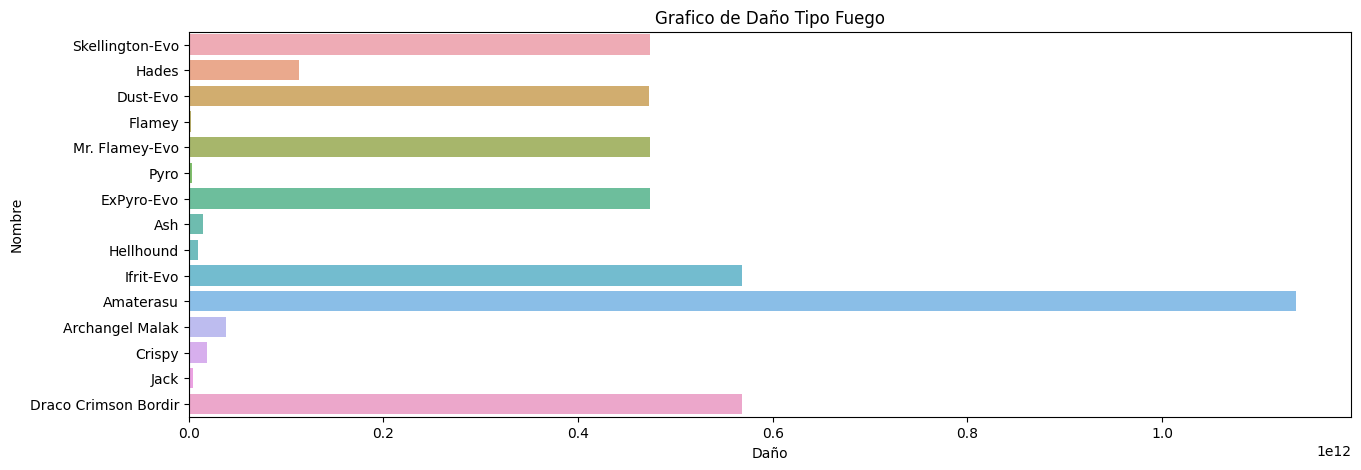

In [15]:
#Grafica daño tipo electrico
plt.figure(figsize=(15,5))
sns.barplot(y= fuego["Nombre"], x=fuego['Dano'], alpha=0.8)
plt.title('Grafico de Daño Tipo Fuego')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()

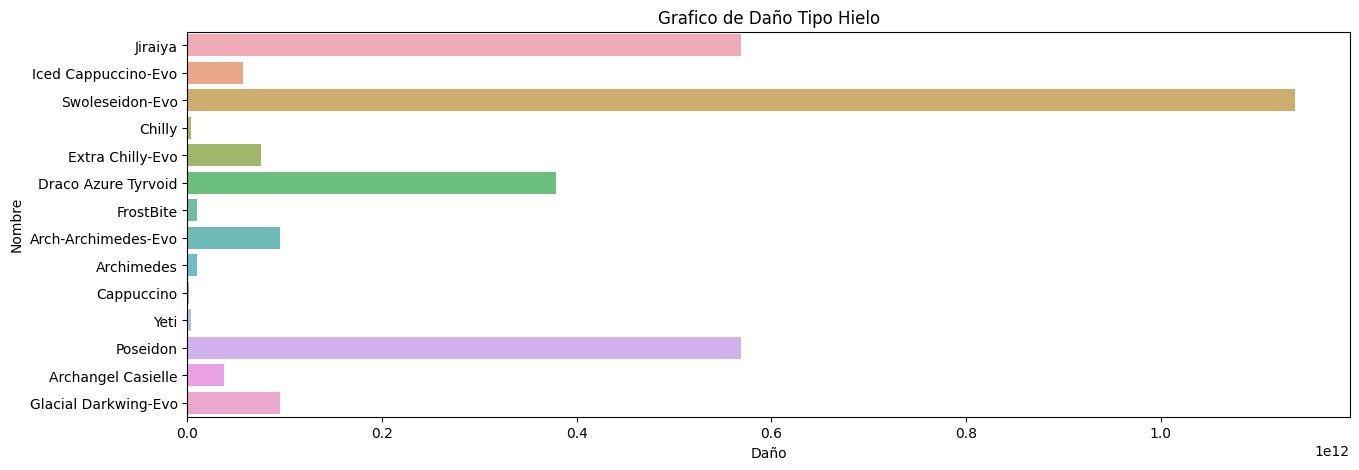

In [16]:
#Grafica daño tipo electrico
plt.figure(figsize=(15,5))
sns.barplot(y= hielo["Nombre"], x=hielo['Dano'], alpha=0.8)
plt.title('Grafico de Daño Tipo Hielo')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()

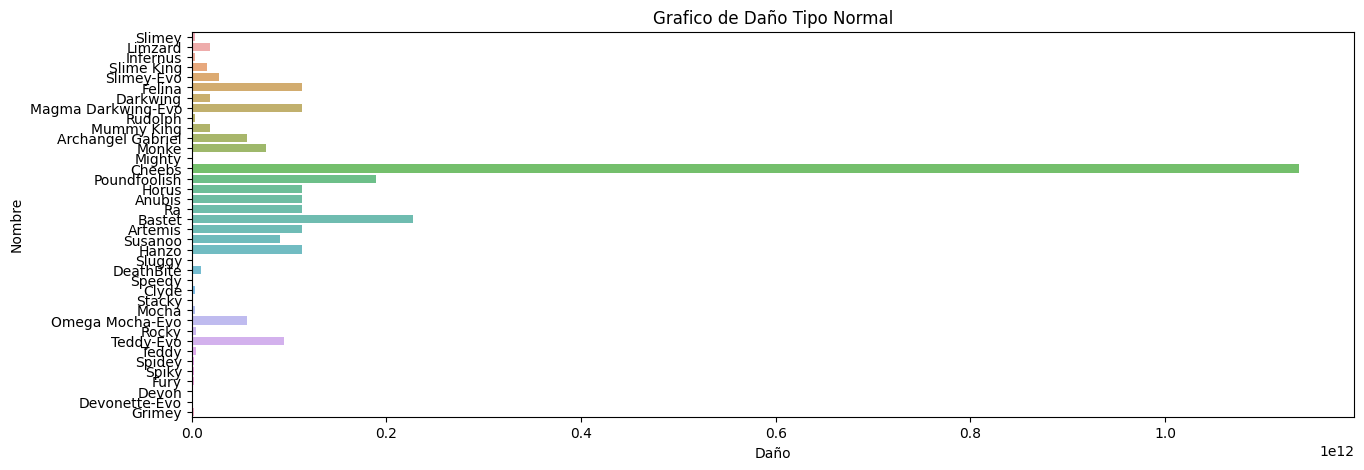

In [17]:
#Grafica daño tipo electrico
plt.figure(figsize=(15,5))
sns.barplot(y= normal["Nombre"], x=normal['Dano'], alpha=0.8)
plt.title('Grafico de Daño Tipo Normal')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()

In [18]:
#Vs de monstruos segun sus nombres
comp= pd.DataFrame()
comp1= (orden.loc[orden['Nombre'] == 'Kevin']) #seleccionando monstruos
comp2= (orden.loc[orden['Nombre'] == 'Omega Mocha-Evo']) #seleccionando monstruos
comp= pd.concat([comp1,comp2])#agregando a un dataset
comp

,Nombre,Rareza,Tipo,Dano,Oro Gastado
47,Kevin,Legendario,Hielo/Fuego/Electrico,85310833739,872750
10,Omega Mocha-Evo,Raro,Normal,56876569060,872750


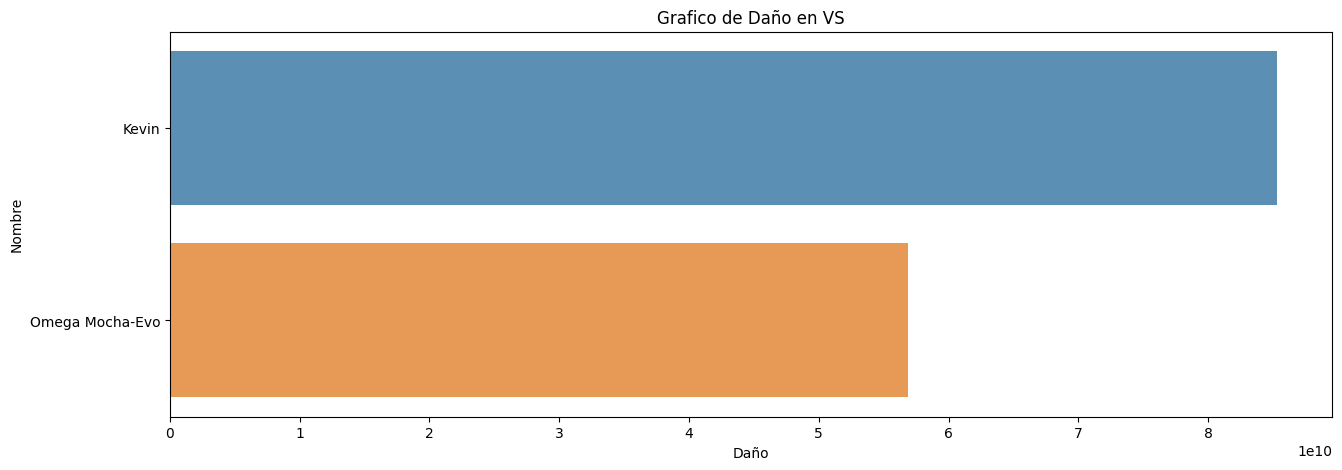

In [19]:
#Grafica daño en VS
plt.figure(figsize=(15,5))
sns.barplot(y= comp["Nombre"], x=comp['Dano'], alpha=0.8)
plt.title('Grafico de Daño en VS')
plt.ylabel('Nombre', fontsize=10)
plt.xlabel('Daño', fontsize=10)
plt.show()